# Devoir 1 &mdash; Algèbre linéaire et manipulation d'images sous Python
**Échéance : 16 février 2025 &ndash; 23h59**
<br><br>

## Récupération des fichiers dans Colab

In [29]:
#
# Exécutez cette cellule pour préparer votre environnement Colab.
#
%%capture
!wget https://benhadid.github.io/m1vpo/static_files/assignments/hw0.zip
!unzip hw0.zip
!mv hw0/* .
!rm -rf hw0
!rm -rf hw0.zip

## Initialisation du bloc-notes

In [30]:
#Importe la fonction print_function à partir de version future de python
from __future__ import print_function

#Setup

# Le module random implémente un générateur de nombres pseudo-aléatoire
import random

# Numpy est le paquetage principal utilisé pour le calcul scientifique dans Python.
# Ce paquetage sera l'une de nos bibliothèques les plus utilisées dans ce cours
import numpy as np


#Importe toutes les méthodes dans les fichiers: linalg.py et imageManip.py
from linalg import *
from imageManip import *


#Matplotlib est une bibliothèque de traçage(dessin) pour python
import matplotlib.pyplot as plt
# Le code suivant fait apparaître les figure de matplotlib en ligne dans le
# notebook au lieu de lancer une nouvelle fenêtre.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # fixer les dimensions par défaut des figures
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


# Quelques instructions supplémentaires pour que le notebook recharge les modules externes en python;
# voir http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Description

Nous allons explorer dans ce devoir des notions de base d'algèbre linéaire et quelques techniques de manipulation d'images sous Python. Cela permettra de mettre tout le monde à la même page par rapport aux compétences requises pour ce module.

Par ailleurs, l'autre objectif de ce devoir est de vous initier/inciter à rechercher sur la toile les fonctionnalités python susceptible de vous aider à résoudre un problème donné. Ainsi, dans de nombreuses fonctions que vous implémenterez ici, vous devez identifier / utiliser les fonctions python qui peuvent vous assister.

## 2. Algèbre Linéaire
Dans cette section, nous allons revoir quelques notions d'algèbre linéaire et apprendre à manipuler des vecteurs et des matrices en python à l'aide de Numpy. À la fin de cette section, vous aurez implémenté toutes les méthodes requises dans le fichier `linalg.py`.

### Question 2.1
En premier lieu, définissez les matrices et vecteurs suivants à l'aide de Numpy. En ce sens, cherchez sur la toile la documentation sur `np.array()`. Dans le bloc de code suivant, définissez $M$ comme une matrice $(4, 3)$, $a$ comme un vecteur ligne $(1, 3)$ et $b$ comme un vecteur colonne $(3, 1)$ :

$$
M = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
10 & 11 & 12 \end{bmatrix}
, \qquad
a = \begin{bmatrix}
1 & 1 & 0
\end{bmatrix}
, \qquad
b = \begin{bmatrix}
-1 \\ 2 \\ 5
\end{bmatrix}  
$$

In [31]:
### VOTRE CODE ICI - DEBUT (remplacez l'instruction 'pass' par votre code)
import numpy as np


M = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])

a = np.array([1, 1, 0])


b = np.array([
    [-1],
    [2],
    [5]
])


### VOTRE CODE ICI - FIN
print("M = \n", M)
print("Dimension de M : ", M.shape)
print()
print("a = ", a)
print("Dimension de a : ", a.shape)
print()
print("b = ", b)
print("Dimension de b : ", b.shape)

M = 
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
Dimension de M :  (4, 3)

a =  [1 1 0]
Dimension de a :  (3,)

b =  [[-1]
 [ 2]
 [ 5]]
Dimension de b :  (3, 1)


### Question 2.2
Implementez la méthode `dot_product()` dans `linalg.py` et vérifiez qu'elle retourne une réponse corrècte pour le produit scalaire $\: b^T a^T$.

In [32]:
# Nous allons tester ici votre implémentation de dot_product(). La réponse corrècte est : [[1]].
import numpy as np

# Définir la fonction dot_product
def dot_product(u, v):
    """
    Calcule le produit scalaire entre les vecteur u et v
    on a comme parametres u et v et la fonction retourne un reel float qui est
    le produit scalaire
    """
    return np.dot(u.T, v.T)

a = np.array([[1, 1, 0]])
b = np.array([[-1], [2], [5]])

aDotB = dot_product(a, b)

aDotB = dot_product(a, b)
print(aDotB)

print("dimension : ", aDotB.shape)

[[-1  2  5]
 [-1  2  5]
 [ 0  0  0]]
dimension :  (3, 3)


### Question 2.3
Implémentez la méthode `complicated_matrix_function()` dans `linalg.py` et utilisez là pour calculer le produit $(b^T a^T) M a^T$

NOTE IMPORTANTE : La méthode `complicated_matrix_function()` s'attend à ce que toutes les entrées soient des tableaux Numpy bidimensionnels. Ceci est nécessaire car les tableaux Numpy 2D peuvent être transposés, tandis que les tableaux 1D (c.-à-d. les vecteurs) ne peuvent pas être transposés.

Pour transposer un tableau bidimensionnel `array`, vous pouvez utiliser la syntaxe `array.T`

In [33]:
# La réponse retournée doit être $[[3], [9], [15], [21]]$ de dimension (4, 1).
import numpy as np

def complicated_matrix_function(M, a, b):
    """
    ici on calcule le produit (b^T a^T) M a^T.
    les parametres ssont M et a et b
    et ca retourne le resultat du produiy


    """

    a = np.atleast_2d(a)
    b = np.atleast_2d(b)

    # calculer le produit dcalaire
    bTaT = np.dot(b.T, a.T)

    # mltiplier par M
    intermediate = bTaT * M

    # multiplier par a^T
    result = np.dot(intermediate, a.T)

    return result


# Test 1
M = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])
a = np.array([[1, 1, 0]])
b = np.array([[-1], [2], [5]])



# Test 2
M_2 = np.array(range(4)).reshape((2, 2))
a_2 = np.array([[1, 1]])  # Vecteur ligne 2D
b_2 = np.array([[10, 10]]).T  # Vecteur colonne 2D


ans = complicated_matrix_function(M, a, b)
print(ans)
print()
print("dimension : ", ans.shape)

[[ 3]
 [ 9]
 [15]
 [21]]

dimension :  (4, 1)


In [34]:
M_2 = np.array(range(4)).reshape((2,2))
a_2 = np.array([[1,1]])
b_2 = np.array([[10, 10]]).T

# La réponse retournée doit être $[[20], [100]]$ de dimension (2, 1).
ans = complicated_matrix_function(M_2, a_2, b_2)
print(ans)
print()
print("dimension : ", ans.shape)

[[ 20]
 [100]]

dimension :  (2, 1)


### Question 2.4
Implémentez les fonctions `svd()` et `get_singular_values()`. Dans `svd()`, vous devez effectuer une décomposition en valeurs singulières ([plus d'info](https://fr.wikipedia.org/wiki/D%C3%A9composition_en_valeurs_singuli%C3%A8res)) de la matrice fournie en entrée. La fonction `get_singular_values()` doit retourner les k plus grandes valeurs singulières (k est donné en paramètre lors d'appels de cette fonction).

In [35]:
 import numpy as np

def svd(M):
    """
    Cette fonction effectue une decomposition en valeurs singulieres pour la matrice M.

elle prend M comme parametres et retourne U S ET VT.

    """
    U, S, Vt = np.linalg.svd(M, full_matrices=False)
    return U, S, Vt

def get_singular_values(M, k):
    """
    czttz fonction etourne les k plus grandes valeurs singulieres de la matrice M.

   elle prens en parametres M et k

    et retourne les k plus grande valeurs singuliers
    """
    _, S, _ = svd(M)
    return S[:k]

# Définir la matrice M
M = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])

 # Renvoyons d'abord la première valeur singulière et affichons la. Elle doit être ~ 25.46.

only_first_singular_value = get_singular_values(M, 1)
print(only_first_singular_value)

# Maintenant, Récupérons les deux premières valeurs singulières.
# Notez que la première valeur singulière est beaucoup plus grande que la seconde.
first_two_singular_values = get_singular_values(M, 2)
print(first_two_singular_values)

# Assurons-nous que la première valeur singulière dans les deux appels est la même.
assert only_first_singular_value[0] == first_two_singular_values[0]

[25.46240744]
[25.46240744  1.29066168]


### Question 2.5
Implementez les méthodes `eigen_decomp()` et `get_eigen_values_and_vectors()`. Vous devez effectuer ici la décomposition en valeurs propres ([plus d'infos](https://fr.wikipedia.org/wiki/D%C3%A9composition_d%27une_matrice_en_%C3%A9l%C3%A9ments_propres)) de la matrice ci-dessous, puis retourner les k plus grandes valeurs propres et vecteurs propres associés.

$$M = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \end{bmatrix}
$$


In [36]:
# Commençons par définir la matrice  M.
# Appuyez-vous sur votre réponse à la question 1.1 plus haut et remplacez 'pass'
# par une instruction corrècte
import numpy as np

def eigen_decomp(M):
    """
    Effectue une décomposition en valeurs propres de la matrice M.

    """

    eigenvalues, eigenvectors = np.linalg.eig(M)
    return eigenvalues, eigenvectors

def get_eigen_values_and_vectors(M, k):
    """
    Retourne les k plus grandes valeurs propres et les vecteurs propres associés de la matrice M.

    """

    eigenvalues, eigenvectors = eigen_decomp(M)

    sorted_indices = np.argsort(eigenvalues)[::-1]


    top_eigenvalues = eigenvalues[sorted_indices][:k]
    top_eigenvectors = eigenvectors[:, sorted_indices][:, :k]

    return top_eigenvalues, top_eigenvectors.T



M = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])


# Récupérons maintenant la première valeur propre et le premier vecteur propre.
# Votre résultat doit retourner une seule valeur propre et un seul vecteur propre.
val, vec = get_eigen_values_and_vectors(M, 1)
print("Première valeur propre = ", val)
print()
print("Premier vecteur propre = \n", vec)
print()
assert len(vec) == 1

# Maintenant, récupérons les deux premières valeurs propres et vecteurs propres.
# Votre résultat doit retourner une liste de deux valeurs propres et une liste de deux tableaux (deux vecteurs propres).
val, vec = get_eigen_values_and_vectors(M, 2)
print("Valeurs propres = ", val)
print()
print("Vecteurs propres = \n", vec)
assert len(vec) == 2

Première valeur propre =  [16.11684397]

Premier vecteur propre = 
 [[-0.23197069 -0.52532209 -0.8186735 ]]

Valeurs propres =  [ 1.61168440e+01 -1.30367773e-15]

Vecteurs propres = 
 [[-0.23197069 -0.52532209 -0.8186735 ]
 [ 0.40824829 -0.81649658  0.40824829]]


## 3. Manipulation d'images

Dans cette deuxième partie, commençons par charger en mémoire quelques images afin de réaliser des opérations matricielles dessus. A la fin de cette section, vous aurez implémenté toutes les fonctions dans le fichier `imageManip.py`

In [37]:
# Exécutez ce code pour définir les emplacements des images que nous utiliserons.
# Vous pouvez modifier ces chemins pour pointer vers vos propres images si vous voulez vous amuser.

image1_path = './image1.jpg'
image2_path = './image2.jpg'

# Définition d'une fonction locale pour
# l'affichage d'images dans ce notebook

def display(img):
    # Show image
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

### Question 3.1
Implémentez la méthode de chargement `load()` dans `imageManip.py`. Les images chargées seront utilisées dans le reste de ce notebook pour visualiser vos résultats.

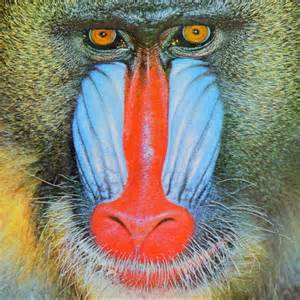

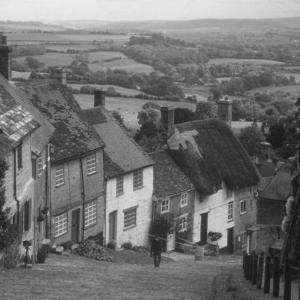

In [38]:
from PIL import Image
from IPython.display import display

def load(image_path):

    image = Image.open(image_path)

    return image
image1 = load(image1_path)
image2 = load(image2_path)

display(image1)
display(image2)

### Question 3.2
Implémentez la méthode `dim_image()` qui transforme une image fournie en entrée en utilisant la formule $x_n = 0.5 \times x_p^2$ pour chaque pixel, où $x_n$ est la nouvelle valeur et $x_p$ est la valeur initiale.

**Remarque :** Rappelons que les valeurs d'intensité d'une image en virgule flottante doivent être dans la plage $[0.0, 1.0]$. Ainsi, la formule ci-dessus réduira les valeurs de ces intensités et produira donc une image plus sombre.

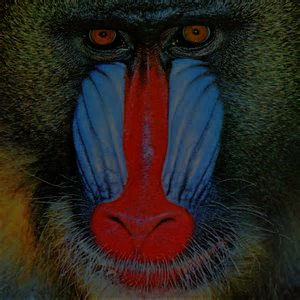

In [39]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def dim_image(image):
    """
    Assombrit une image en appliquant la formule xn = 0.5 * xp^2 à chaque pixel.

    """

    image_array = np.array(image, dtype=np.float32) / 255.0
    # Appliquer la formule xn = 0.5 * xp^2
    dimmed_array = 0.5 * (image_array ** 2)

    dimmed_array = np.clip(dimmed_array, 0.0, 1.0)


    dimmed_image = Image.fromarray((dimmed_array * 255).astype(np.uint8))

    return dimmed_image


image1_path = './image1.jpg'
image2_path = './image2.jpg'

image1 = Image.open(image1_path)


new_image = dim_image(image1)

display(new_image)

### Question 3.3
Implémentez la méthode `convert_to_grey_scale()` pour convertir une image en niveaux de gris (c.f. voir description de la fonction dans le fichier `imageManip.py` pour plus de détails).

array([[ 78,  68,  81, ..., 108, 105,  95],
       [ 78,  83,  90, ..., 105, 105, 111],
       [ 92,  89,  74, ...,  88,  67,  76],
       ...,
       [142, 151, 143, ...,  94,  97,  97],
       [148, 155, 145, ...,  97, 100, 100],
       [152, 157, 144, ...,  98, 100, 101]], dtype=uint8)
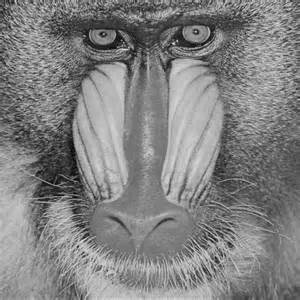

In [40]:
import cv2
import numpy as np
from PIL import Image

def convert_to_grey_scale(image):
    """Convertit une image en niveaux de gris."""
    image_array = np.array(image)  # Convertir l'image PIL en numpy array
    image_gray = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)
    return image_gray


image1_path = './image1.jpg'
image1 = Image.open(image1_path)



grey_image = convert_to_grey_scale(image1)
display(grey_image)

### Question 3.4

Implémentez la méthode `rgb_exclusion()` pour décomposer une image en ces trois canaux R (rouge), G (vert), B (bleu), puis retourner une nouvelle image en excluant le canal spécifié.

Ci-dessous, l'image n°1 où le canal rouge a été supprimé.


array([[[ 25,  82,   0],
        [ 17,  72,   0],
        [ 33,  84,   0],
        ...,
        [ 80, 112,   0],
        [ 75, 110,   0],
        [ 65, 100,   0]],

       [[ 25,  82,   0],
        [ 32,  87,   0],
        [ 42,  93,   0],
        ...,
        [ 75, 109,   0],
        [ 75, 110,   0],
        [ 79, 116,   0]],

       [[ 37,  96,   0],
        [ 36,  93,   0],
        [ 24,  77,   0],
        ...,
        [ 56,  93,   0],
        [ 35,  72,   0],
        [ 42,  82,   0]],

       ...,

       [[146, 149,   0],
        [156, 159,   0],
        [150, 150,   0],
        ...,
        [ 87,  93,   0],
        [ 90,  96,   0],
        [ 90,  96,   0]],

       [[153, 156,   0],
        [160, 163,   0],
        [154, 152,   0],
        ...,
        [ 88,  96,   0],
        [ 91,  99,   0],
        [ 91,  99,   0]],

       [[157, 160,   0],
        [164, 164,   0],
        [153, 152,   0],
        ...,
        [ 89,  97,   0],
        [ 91,  99,   0],
        [ 92, 100,   0]]], dtype=uint8)
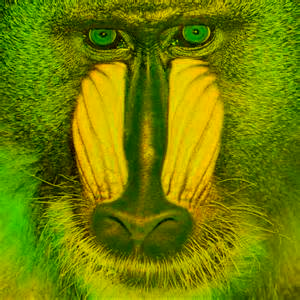

Ci-dessous, l'image n°1 où le canal vert a été supprimé.


array([[[ 25,   0,  91],
        [ 17,   0,  81],
        [ 33,   0,  94],
        ...,
        [ 80,   0, 111],
        [ 75,   0, 106],
        [ 65,   0,  96]],

       [[ 25,   0,  91],
        [ 32,   0,  96],
        [ 42,   0, 103],
        ...,
        [ 75,   0, 108],
        [ 75,   0, 106],
        [ 79,   0, 112]],

       [[ 37,   0, 105],
        [ 36,   0, 102],
        [ 24,   0,  87],
        ...,
        [ 56,   0,  89],
        [ 35,   0,  68],
        [ 42,   0,  77]],

       ...,

       [[146,   0, 127],
        [156,   0, 134],
        [150,   0, 126],
        ...,
        [ 87,   0,  98],
        [ 90,   0, 101],
        [ 90,   0, 101]],

       [[153,   0, 131],
        [160,   0, 138],
        [154,   0, 128],
        ...,
        [ 88,   0, 103],
        [ 91,   0, 106],
        [ 91,   0, 106]],

       [[157,   0, 135],
        [164,   0, 140],
        [153,   0, 126],
        ...,
        [ 89,   0, 104],
        [ 91,   0, 106],
        [ 92,   0, 107]]], dtype=uint8)
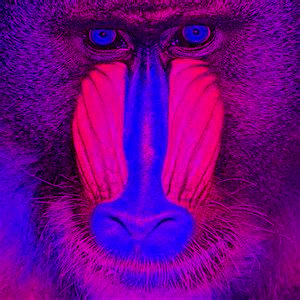

Ci-dessous, l'image n°1 où le canal bleu a été supprimé.


array([[[  0,  82,  91],
        [  0,  72,  81],
        [  0,  84,  94],
        ...,
        [  0, 112, 111],
        [  0, 110, 106],
        [  0, 100,  96]],

       [[  0,  82,  91],
        [  0,  87,  96],
        [  0,  93, 103],
        ...,
        [  0, 109, 108],
        [  0, 110, 106],
        [  0, 116, 112]],

       [[  0,  96, 105],
        [  0,  93, 102],
        [  0,  77,  87],
        ...,
        [  0,  93,  89],
        [  0,  72,  68],
        [  0,  82,  77]],

       ...,

       [[  0, 149, 127],
        [  0, 159, 134],
        [  0, 150, 126],
        ...,
        [  0,  93,  98],
        [  0,  96, 101],
        [  0,  96, 101]],

       [[  0, 156, 131],
        [  0, 163, 138],
        [  0, 152, 128],
        ...,
        [  0,  96, 103],
        [  0,  99, 106],
        [  0,  99, 106]],

       [[  0, 160, 135],
        [  0, 164, 140],
        [  0, 152, 126],
        ...,
        [  0,  97, 104],
        [  0,  99, 106],
        [  0, 100, 107]]], dtype=uint8)
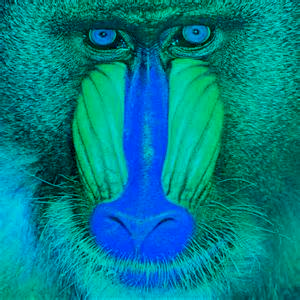

In [41]:
import numpy as np
import cv2

def rgb_exclusion(image, channel):
    """Retourne l'image en excluant le canal spécifié (R, G ou B).
    """

    if isinstance(image, Image.Image):
        image = np.array(image)


    if len(image.shape) != 3 or image.shape[2] != 3:
        raise ValueError("L'image doit être une image couleur avec 3 canaux.")


    out = image.copy()

    channel_idx = {"R": 2, "G": 1, "B": 0}

    if channel in channel_idx:
        out[:, :, channel_idx[channel]] = 0
    else:
        raise ValueError("Le canal doit être 'R', 'G' ou 'B'.")

    return out
image1_path = './image1.jpg'
image1 = cv2.imread(image1_path)

without_red = rgb_exclusion(image1, 'R')
without_blue = rgb_exclusion(image1, 'B')
without_green = rgb_exclusion(image1, 'G')

print("Ci-dessous, l'image n°1 où le canal rouge a été supprimé.")
display(without_red)

print("Ci-dessous, l'image n°1 où le canal vert a été supprimé.")
display(without_green)

print("Ci-dessous, l'image n°1 où le canal bleu a été supprimé.")
display(without_blue)


### Question 3.5
Implémentez la méthode `lab_decomposition()` pour décomposer une image en ces trois canaux L*, a*, b*, puis retournez le canal spécifié ([plus d'info](https://fr.wikipedia.org/wiki/L*a*b*_CIE_1976)).

Ci-dessous, le canal L* dans la décomposition L*a*b* de l'image n°1


array([[ 88,  78,  91, ..., 118, 115, 105],
       [ 88,  94, 101, ..., 115, 115, 122],
       [103, 100,  83, ...,  98,  75,  86],
       ...,
       [153, 162, 154, ..., 101, 105, 105],
       [159, 166, 156, ..., 105, 108, 108],
       [163, 167, 156, ..., 106, 108, 109]], dtype=uint8)
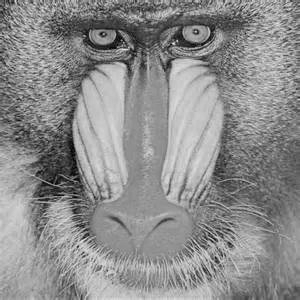

Ci-dessous, le canal a* dans la décomposition L*a*b* de l'image n°1


array([[124, 125, 125, ..., 122, 120, 120],
       [124, 124, 125, ..., 121, 120, 120],
       [123, 124, 125, ..., 120, 120, 119],
       ...,
       [120, 119, 120, ..., 129, 129, 129],
       [119, 119, 120, ..., 129, 129, 129],
       [119, 120, 119, ..., 129, 129, 129]], dtype=uint8)
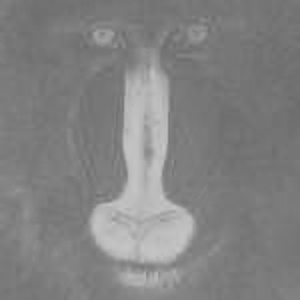

Ci-dessous, le canal b* dans la décomposition L*a*b* de l'image n°1


array([[161, 161, 159, ..., 146, 147, 147],
       [161, 160, 158, ..., 147, 147, 148],
       [162, 161, 159, ..., 149, 150, 151],
       ...,
       [127, 127, 125, ..., 132, 132, 132],
       [127, 127, 124, ..., 134, 134, 134],
       [127, 125, 124, ..., 133, 134, 134]], dtype=uint8)
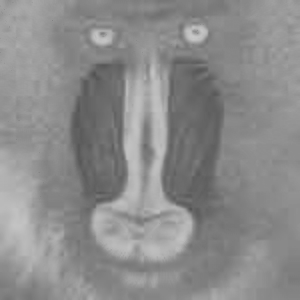

In [42]:
import numpy as np
import cv2

def lab_decomposition(image, channel):
    """Décompose l'image en espace de couleur L*a*b* et retourne le canal spécifié.


    """
    # Vérifier si l'image est un objet PIL et la convertir en numpy array
    if isinstance(image, Image.Image):
        image = np.array(image)

    if len(image.shape) != 3 or image.shape[2] != 3:
        raise ValueError("L'image doit être une image couleur avec 3 canaux.")


    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)


    channel_idx = {"L": 0, "A": 1, "B": 2}

    if channel in channel_idx:
        out = lab_image[:, :, channel_idx[channel]]
    else:
        raise ValueError("Le canal doit être 'L', 'A' ou 'B'.")

    return out

# Charger l'image avec OpenCV
image1_path = './image1.jpg'
image1 = cv2.imread(image1_path)
image_l = lab_decomposition(image1, 'L')
image_a = lab_decomposition(image1, 'A')
image_b = lab_decomposition(image1, 'B')

print("Ci-dessous, le canal L* dans la décomposition L*a*b* de l'image n°1")
display(image_l)

print("Ci-dessous, le canal a* dans la décomposition L*a*b* de l'image n°1")
display(image_a)

print("Ci-dessous, le canal b* dans la décomposition L*a*b* de l'image n°1")
display(image_b)

### Question 3.6
Implémentez la méthode `hsv_decomposition()` pour décomposer une image en ces trois canaux H, S, V, puis retournez le canal spécifié ([plus d'info](https://fr.wikipedia.org/wiki/Teinte_Saturation_Valeur)).

Ci-dessous, le canal H dans la décomposition HSV de l'image n°1


array([[26, 26, 25, ..., 31, 33, 33],
       [26, 26, 25, ..., 31, 33, 33],
       [26, 26, 25, ..., 33, 33, 34],
       ...,
       [86, 86, 90, ..., 16, 16, 16],
       [86, 86, 92, ..., 16, 16, 16],
       [86, 90, 91, ..., 16, 16, 16]], dtype=uint8)
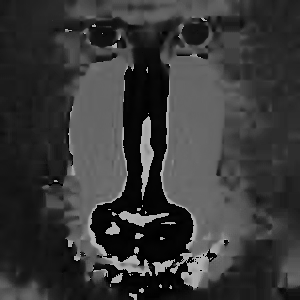

Ci-dessous, le canal S dans la décomposition HSV de l'image n°1


array([[185, 201, 165, ...,  73,  81,  89],
       [185, 170, 151, ...,  80,  81,  81],
       [165, 165, 185, ..., 101, 131, 124],
       ...,
       [ 38,  40,  41, ...,  29,  28,  28],
       [ 41,  39,  43, ...,  37,  36,  36],
       [ 40,  37,  45, ...,  37,  36,  36]], dtype=uint8)
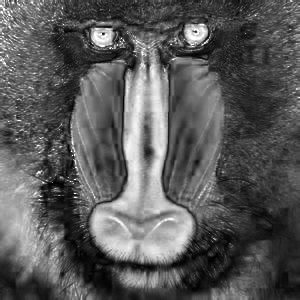

Ci-dessous, le canal V dans la décomposition HSV de l'image n°1


array([[ 91,  81,  94, ..., 112, 110, 100],
       [ 91,  96, 103, ..., 109, 110, 116],
       [105, 102,  87, ...,  93,  72,  82],
       ...,
       [149, 159, 150, ...,  98, 101, 101],
       [156, 163, 154, ..., 103, 106, 106],
       [160, 164, 153, ..., 104, 106, 107]], dtype=uint8)
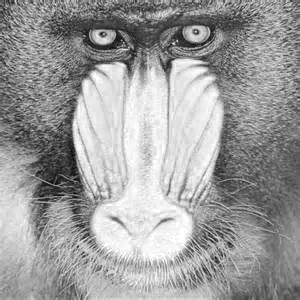

In [43]:
import numpy as np
import cv2

def hsv_decomposition(image, channel):
    """Décompose l'image en espace de couleur HSV et retourne le canal spécifié.

    """

    if isinstance(image, Image.Image):
        image = np.array(image)


    if len(image.shape) != 3 or image.shape[2] != 3:
        raise ValueError("L'image doit être une image couleur avec 3 canaux.")


    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Identifier l'index du canal demandé
    channel_idx = {"H": 0, "S": 1, "V": 2}

    if channel in channel_idx:
        out = hsv_image[:, :, channel_idx[channel]]
    else:
        raise ValueError("Le canal doit être 'H', 'S' ou 'V'.")

    return out

image1_path = './image1.jpg'
image1 = cv2.imread(image1_path)

image_h = hsv_decomposition(image1, 'H')
image_s = hsv_decomposition(image1, 'S')
image_v = hsv_decomposition(image1, 'V')

print("Ci-dessous, le canal H dans la décomposition HSV de l'image n°1")
display(image_h)

print("Ci-dessous, le canal S dans la décomposition HSV de l'image n°1")
display(image_s)

print("Ci-dessous, le canal V dans la décomposition HSV de l'image n°1")
display(image_v)

### Question 3.7
Dans la méthode `mix_images()`, créez une nouvelle image constituée de la moitié gauche de l'image n°1 et la moitié droite de l'image n°2. Pour chaque image en entrée, vous devez exclure le canal spécifié.

Une implémentation correcte devrait afficher la moitié gauche du Mandrill sans le canal rouge et la moitié droite de l'image des maisons sans le canal vert.

array([[[  0,  82,  25],
        [  0,  72,  17],
        [  0,  84,  33],
        ...,
        [201,   0, 201],
        [201,   0, 201],
        [200,   0, 200]],

       [[  0,  82,  25],
        [  0,  87,  32],
        [  0,  93,  42],
        ...,
        [199,   0, 199],
        [199,   0, 199],
        [199,   0, 199]],

       [[  0,  96,  37],
        [  0,  93,  36],
        [  0,  77,  24],
        ...,
        [198,   0, 198],
        [198,   0, 198],
        [198,   0, 198]],

       ...,

       [[  0, 149, 146],
        [  0, 159, 156],
        [  0, 150, 150],
        ...,
        [ 91,   0,  91],
        [ 73,   0,  73],
        [ 32,   0,  32]],

       [[  0, 156, 153],
        [  0, 163, 160],
        [  0, 152, 154],
        ...,
        [ 88,   0,  88],
        [ 71,   0,  71],
        [ 30,   0,  30]],

       [[  0, 160, 157],
        [  0, 164, 164],
        [  0, 152, 153],
        ...,
        [ 88,   0,  88],
        [ 70,   0,  70],
        [ 29,   0,  29]]], dtype=uint8)
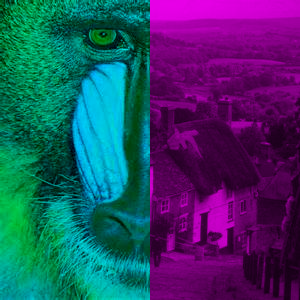

19486466

In [44]:
import cv2
import numpy as np
from PIL import Image

def rgb_exclusion(image, channel):
    """Exclut le canal spécifié de l'image."""
    image_array = np.array(image, dtype=np.float32) / 255.0
    out = image_array.copy()

    channel_dict = {'R': 0, 'G': 1, 'B': 2}
    if channel in channel_dict:
        out[:, :, channel_dict[channel]] = 0  # Mettre à zéro le canal spécifié

    return (out * 255).astype(np.uint8)  # Retour à l'échelle 0-255

def mix_images(image1, image2, channel1, channel2):
    """Mélange deux images en prenant la moitié gauche de l'image1 et la moitié droite de l'image2,
       tout en excluant les canaux spécifiés."""

    # Vérifier si les images sont bien chargées
    if image1 is None or image2 is None:
        raise ValueError("L'une des images n'a pas été chargée correctement. Vérifiez les chemins d'accès.")

    # Convertir PIL en numpy si nécessaire
    if isinstance(image1, Image.Image):
        image1 = np.array(image1)
    if isinstance(image2, Image.Image):
        image2 = np.array(image2)

    # Vérifier que les images ont les mêmes dimensions
    if image1.shape != image2.shape:
        raise ValueError("Les images doivent avoir les mêmes dimensions.")

    # Appliquer l'exclusion des canaux
    image1_no_channel = rgb_exclusion(image1, channel1)
    image2_no_channel = rgb_exclusion(image2, channel2)

    # Diviser en deux moitiés
    width = image1.shape[1] // 2
    left_half = image1_no_channel[:, :width, :]
    right_half = image2_no_channel[:, width:, :]

    # Concaténer les moitiés
    out = np.concatenate((left_half, right_half), axis=1)

    return out

# Chargement des images
image1_path = "image1.jpg"
image2_path = "image2.jpg"

image1 = Image.open(image1_path)
image2 = Image.open(image2_path)
image_mixed = mix_images(image1, image2, channel1='R', channel2='G')
display(image_mixed)

#Test de vérification : la somme des pixels de l'image doit être ~76417.51
np.sum(image_mixed)

### Question 3.8

Implémentez la fonction `mix_quadrants()` dans `imageManip.py`.
Cette fonction prend une image et effectue une opération différente sur chacun des quatre quadrants de l'image. Ensuite, elle combine les quatre quadrants ensemble.

Voici les quatre opérations que vous devez effectuer sur les 4 quadrants :
- Quadrant supérieur gauche : supprimez le canal "R" à l'aide de `rgb_exclusion()`.
- Quadrant supérieur droit : atténuez le quadrant à l'aide de `dim_image()`.
- Quadrant inférieur gauche : éclaircissez le quadrant à l'aide de la fonction  $x_n = x_p^{0.5}$
- Quadrant inférieur droit : supprimez le canal "R" à l'aide de `rgb_exclusion()`.

In [28]:
mixed_quadrants = mix_quadrants(image1)
display(mixed_quadrants)


AttributeError: shape

## 4. Livrables
### 4.1. Le code (à remettre sur [benhadid.ddns.net](https://benhadid.ddns.net/course/M1_VPO/hw0))

Le fichier "devoir1.zip" contenant les fichiers **`linalg.py`** et **`imageManip.py`** modifiés dans les zones indiquées par `### VOTRE CODE ICI - DEBUT` et `### VOTRE CODE ICI - FIN`.

**Le code sera remis <del>en classe pendant votre séance de TP</del> au serveur INGInious - <span style='color:Red'> aucun document ou code ne sera accepté si envoyé par mail ou clé USB</span>**.

In [46]:
# Exécutez cette cellule puis récupérez votre fichier "devoir1.zip" depuis le panneau gauche dans Colab
# Si nécessaire, faites un 'refresh' sur le répertoire pour faire apparaître le fichier 'devoir1.zip'

!zip -r ./devoir1.zip linalg.py imageManip.py



updating: linalg.py (deflated 72%)
updating: imageManip.py (deflated 75%)
